NAME: **SULEGAMA JHANSI**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

<ipython-input-6-13cae9629eba>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').notnull().all()]
<ipython-input-6-13cae9629eba>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').notnull().all()]
<ipython-input-6-13cae9629eba>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=

Descriptive Statistics:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427  

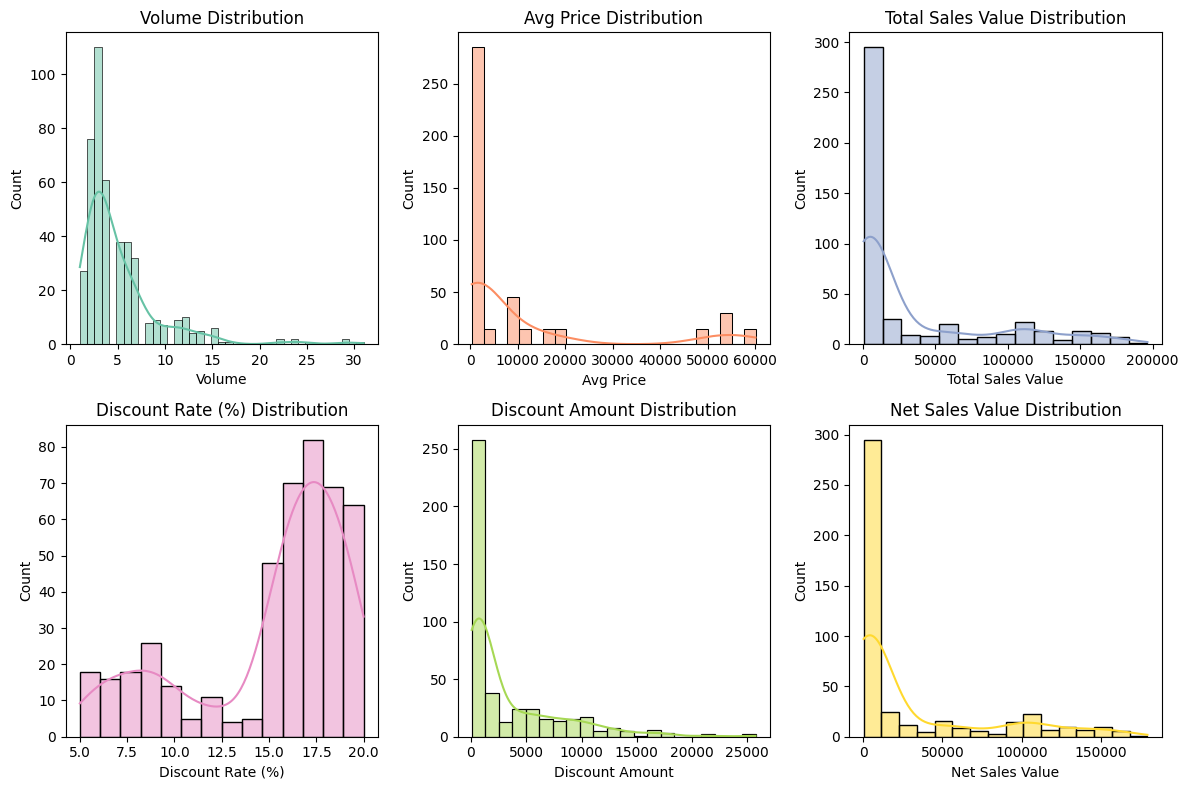

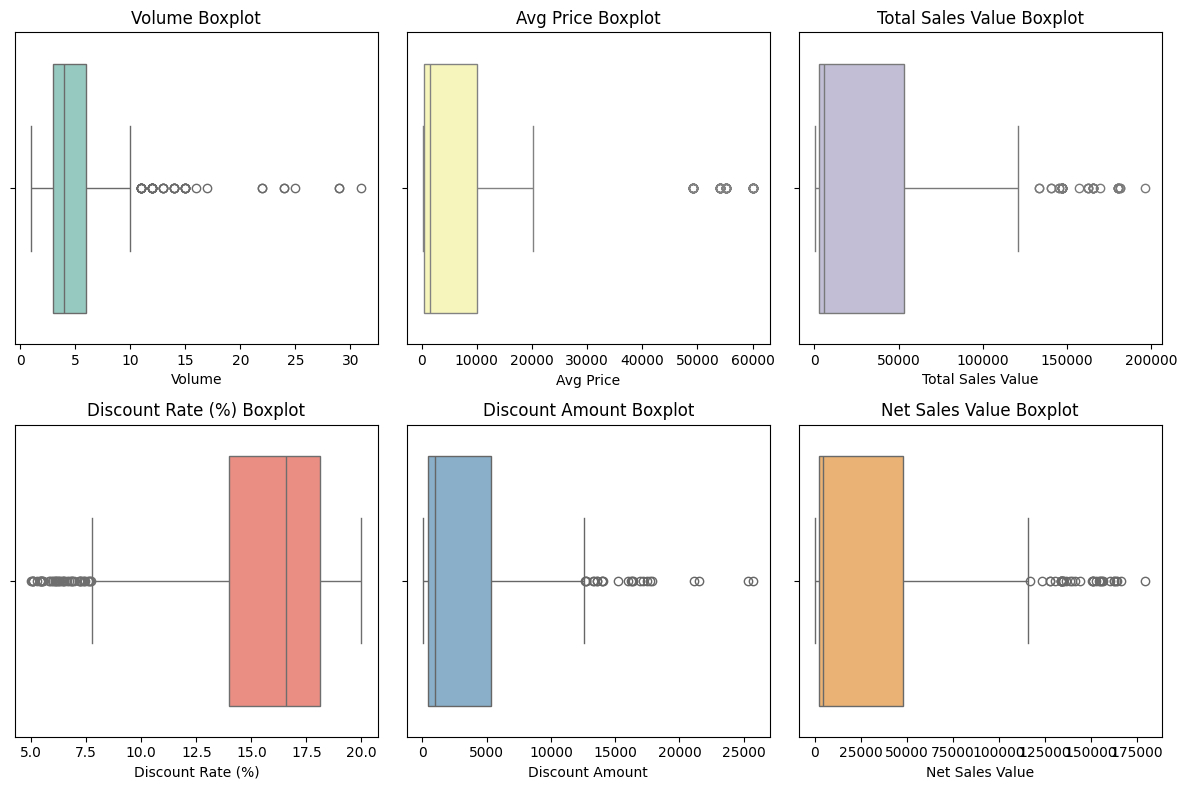

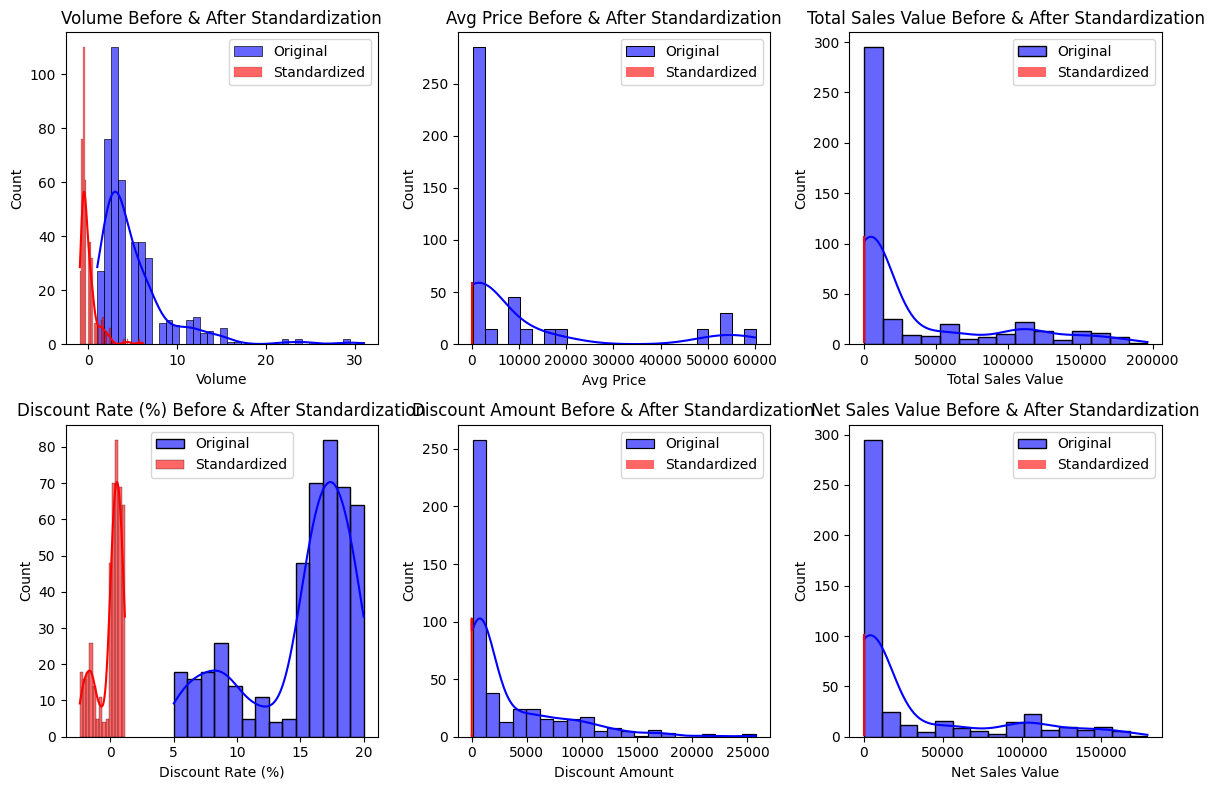

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load dataset (replace 'your_dataset.csv' with the actual path)
df = pd.read_csv('/content/sales_data_with_discounts.csv')

# Step 1: Convert date columns to datetime type
# Identify columns with date-like strings and convert them
date_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').notnull().all()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Step 2: Descriptive Statistics for Numerical Columns
# Identify numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate descriptive statistics (mean, median, mode, standard deviation)
desc_stats = df[num_cols].describe()

# Calculate mode
mode_values = df[num_cols].mode().iloc[0]

# Display descriptive statistics
print("Descriptive Statistics:")
print(desc_stats)
print("\nMode Values:")
print(mode_values)

# Step 3: Data Visualization for Numerical Columns

# Histograms for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[i-1])  # Changed color palette
    plt.title(f"{col} Distribution")
plt.tight_layout()

# Boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color=sns.color_palette("Set3")[i-1])  # Changed color palette
    plt.title(f"{col} Boxplot")
plt.tight_layout()

# Step 4: Standardization of Numerical Variables

# Standardize numerical columns
scaler = StandardScaler()
df_scaled = df.copy()

# Apply standardization to numerical columns
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Display a comparison of distributions before and after standardization
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='blue', label='Original', alpha=0.6)
    sns.histplot(df_scaled[col], kde=True, color='red', label='Standardized', alpha=0.6)
    plt.legend()
    plt.title(f"{col} Before & After Standardization")
plt.tight_layout()

# Step 5: One-Hot Encoding for Categorical Data
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument name
encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

# Concatenate the one-hot encoded columns back to the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1).drop(columns=cat_cols)

# Display the transformed dataset
print("Transformed dataset with one-hot encoding:")
print(df_encoded.head())


# Show all graphs
plt.show()


## Conclusion

- **Descriptive Analytics**: The statistical measures (mean, median, mode, standard deviation) provided insights into the central tendencies and dispersion of numerical variables in the dataset.
  
- **Data Visualizations**: Histograms and boxplots were used to understand the distribution and spread of numerical data, as well as identify potential outliers. Bar charts for categorical variables helped visualize their distribution across different categories.

- **Standardization**: Scaling the numerical features improved uniformity across the dataset, ensuring that each feature contributes equally when used in machine learning models. This step is essential for algorithms sensitive to the scale of input data.

- **One-Hot Encoding**: Converting categorical data into binary features (dummy variables) makes it compatible with machine learning algorithms, enabling the model to better understand and process categorical variables.

